# Stationary underlying problem : Multi-armed bandit

In the language of reinforcement learning, this problem can be modeled as a single "state" with possible actions given by the number of arms. (one of the simplest RL problems)

In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [2]:
Narms=6
arms=np.random.rand(Narms)
lRate=0.1

In [3]:
arms

array([ 0.06765571,  0.74735905,  0.35977435,  0.57429015,  0.02918199,
        0.83528795])

In [4]:
def reward(p):
    reward=0
    for i in range(10):
        if (random.random() < p):
            reward+=1
    return reward

Historical actions and results stored in a $k \times 2$ sized matrix where each the first element of each row corresponds to the arm played and the second element corresponds to the payoff received.

## Q-function

The function $Q(s,a)$ tries to estimate the value of each action $a$ in each state $s$. Here, the `AvgEarningsSoFar` for each action serves as such a function.

In [5]:
CountsSoFar = np.zeros(Narms)
AvgEarningsSoFar = np.zeros(Narms)

## Action policy

The policy function $\pi(s)$ determines the action to be taken in each state.

In [6]:
# Epsilon-greedy approach to choose the next action
def greedyChoice(AvgEarningsSoFar,eps):
    if (random.random() > eps): # greedy arm choice
        choice = bestArm(AvgEarningsSoFar)
    else: # random arm choice
        choice = np.random.randint(len(AvgEarningsSoFar))
    return choice

# Greedy method to select the most profitable arm so far
def bestArm(AvgEarningsSoFar):
    bestArm = np.argmax(AvgEarningsSoFar)
    return bestArm

In [7]:
# Relaxing to the ground state at a fixed (low-enough) temperature
def softmaxChoice(AvgEarningsSoFar, beta):
    prob = np.exp(beta*AvgEarningsSoFar)
    prob = prob/np.sum(prob)
    choice = np.random.choice(np.arange(0,Narms),p=prob)
    return choice

In [8]:
plt.xlabel("Plays")
plt.ylabel("Average reward")

for i in range(200):
    
    #thisChoice = greedyChoice(AvgEarningsSoFar,eps=lRate)
    thisChoice = softmaxChoice(AvgEarningsSoFar,beta=2)
    
    thisPayoff = reward(arms[thisChoice])
    CountsSoFar[thisChoice] += 1
    OldAvg = AvgEarningsSoFar[thisChoice]
    AvgEarningsSoFar[thisChoice] = OldAvg + (thisPayoff - OldAvg)/CountsSoFar[thisChoice]
    
    runningMean = np.average(AvgEarningsSoFar,weights=CountsSoFar)
    plt.scatter(i, runningMean)

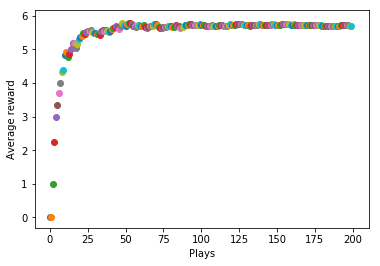

In [9]:
plt.show()

In [10]:
arms

array([ 0.06765571,  0.74735905,  0.35977435,  0.57429015,  0.02918199,
        0.83528795])

In [11]:
AvgEarningsSoFar

array([ 0.        ,  0.        ,  0.        ,  5.76262626,  0.        ,  0.        ])

In [12]:
np.average(AvgEarningsSoFar,weights=CountsSoFar)

5.7049999999999992

In [13]:
CountsSoFar

array([   1.,    0.,    0.,  198.,    1.,    0.])